In [26]:
#neural networking feed forward using topological sort

import random

class neuron(object):
    def __init__(self, ind, weight, act):
        self.index = ind
        self.weight = weight
        self.act = act

        
random.seed()
        
    
# network with two layers, one input, one hidden, one output. 6 neurons in total network apart from inputs

#fully connected network

#inp    neuron1(relu) 
#inp    neuron2(relu)     output6(sigmoid)
#inp    neuron3(relu)
#inp    neuron4(relu)
#       neuron5(relu)

#creating a graph(adjacency list) to represent neural network

net = {}
inp = [10,10,10,10]
actfns = ["no","no","no","no","relu","relu","relu","relu","relu","sig"]
inputs = [neuron(i,random.randint(1,10),1) for i in range(4)]
#hidden_layer_1 = [neuron(i,random.rand(0.1,1),"relu") for i in range(4,9)]
#layer_2 = [neuron(9, ,"sig")]

hidden_layer_1 = []
for i in inputs:
    hidden_layer_1 = []
    for j in range(4,9):
        r = 0.01*random.random()
        hidden_layer_1.append(neuron(j,r,"relu"))
        
    net[i.index] = hidden_layer_1

for i in hidden_layer_1:
    layer_2 = []
    layer_2.append(neuron(9,random.random(),"sig"))
    net[i.index] = layer_2

net[9] = []
    
net

{0: [<__main__.neuron at 0x103f55898>,
 1: [<__main__.neuron at 0x103f6c860>,
 2: [<__main__.neuron at 0x103f6c5c0>,
 3: [<__main__.neuron at 0x103f6c978>,
 4: [<__main__.neuron at 0x103f55b00>],
 5: [<__main__.neuron at 0x103f6ca90>],
 6: [<__main__.neuron at 0x103f6cac8>],
 7: [<__main__.neuron at 0x103f6cb00>],
 8: [<__main__.neuron at 0x103f6cb38>],
 9: []}

In [27]:
import math
#using topological sort to do forward propagation and printing output at each neuron 

def indegree(net):
    indeg = [0]*len(net)
    for node in net:
        for otnode in net:
            if node is not otnode:
                for neu in net[otnode]:
                    if neu.index == node:
                        indeg[node]+=1
      
    return indeg


def calculate_output(net, sumn, indeg):
    #activation functions
    act = {"relu": lambda x: max(0,x), 
           "sig": lambda x: 1/(1+math.exp(-x)), 
           "no": lambda x:x,
           "tanh": lambda x: math.tanh(x), 
           "Elu": lambda x: max(0.01*x,x)
          }

    queue = [i for i in range(len(indeg)) if indeg[i] == 0]
    
    count = 0
    
    while queue:
        
        top = queue.pop(0)
        
        count+=1
        sm_top = act[actfns[top]](sumn[top])
                                  
        for neu in net[top]:
            sumn[neu.index] += sm_top*neu.weight
            
            indeg[neu.index] -= 1
            if indeg[neu.index] == 0:
                queue.append(neu.index)
            
    if count != len(net):
        print("found circle")
        return
    
    sumn[-1] = act[neu.act](sumn[-1])
    return sumn
    
    
    
sumn = [0]*len(net)
for i in range(len(inp)):
    sumn[i] = inp[i]
    
indeg = indegree(net)
su = calculate_output(net, sumn, indeg)
print("output of each neuron: ")
print(su[:4])
print("first four: inputs" , su[:4])
print("four hidden layer neurons with relu:",su[4:9])
print("last one after sigmoid: ", su[9])
sumn

output of each neuron: 
[10, 10, 10, 10]
first four: inputs [10, 10, 10, 10]
four hidden layer neurons with relu: [0.23400985136269817, 0.15969108703662183, 0.23293216001327016, 0.1483956857765833, 0.20002934540240763]
last one after sigmoid:  0.6413899112794987


[10,
 10,
 10,
 10,
 0.23400985136269817,
 0.15969108703662183,
 0.23293216001327016,
 0.1483956857765833,
 0.20002934540240763,
 0.6413899112794987]

hidden layer  0  mean:  -0.0011728342345722778  stds:  0.9820343822412896
hidden layer  1  mean:  -0.0005549579144104043  stds:  0.9816538304245632
hidden layer  2  mean:  0.0014949039550711666  stds:  0.9816399422945947
hidden layer  3  mean:  -0.0008817035205276654  stds:  0.9816834677825703
hidden layer  4  mean:  0.0018850459018778733  stds:  0.9817048813174646
hidden layer  5  mean:  -0.0003096330152620919  stds:  0.9816054147332214
hidden layer  6  mean:  -6.315937039574092e-05  stds:  0.9816712533745183
hidden layer  7  mean:  0.0003860462823029906  stds:  0.9817401723118251
hidden layer  8  mean:  -0.0018710890373545431  stds:  0.9816134053600307
hidden layer  9  mean:  0.00015130619632828713  stds:  0.9816895275368257


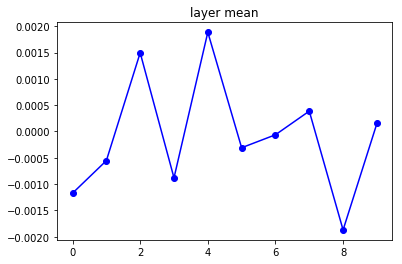

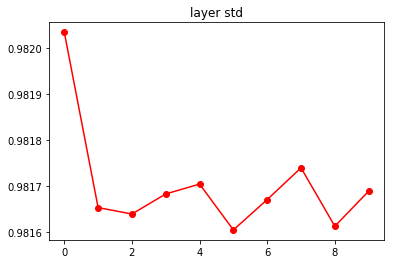

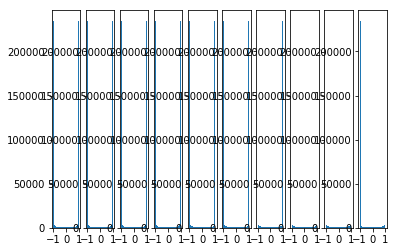

In [153]:
import numpy as np
#trying with different activations
#declaring the input with size 500 and 1000 samples
D = np.random.randn(1000,500)

#creating 10 layers with 500 neurons each
hidden_layers = [500]*10
Hs = {}
act = {"relu": lambda x: np.maximum(0,x), "tanh": lambda x: np.tanh(x), "sigm": lambda x: 1/(1+np.exp(-x))}
nonlinearity = ["tanh"]*len(hidden_layers)
for i in range(len(hidden_layers)):
    X = D if i == 0 else Hs[i-1]
    Win = X.shape[1]
    Wout = hidden_layers[i]
    
    #xavier initialization
    #W = np.random.randn(Win, Wout)/np.sqrt(Win)
    W = 1*np.random.randn(Win, Wout)
    
    H = np.dot(X,W)
    H = act[nonlinearity[i]](H)
    Hs[i] = H
    
    
import matplotlib.pyplot as plt

layers_mean = [np.mean(H) for i,H in Hs.items()]
layers_stds = [np.std(H) for i,H in Hs.items()]

for i in Hs:
    print("hidden layer ", i, " mean: ",layers_mean[i], " stds: ", layers_stds[i])
    
plt.figure()
plt.subplot(111)
plt.plot(Hs.keys(), layers_mean, 'ob-')
plt.title("layer mean")

plt.figure()
plt.subplot(111)
plt.plot(Hs.keys(), layers_stds, 'or-')
plt.title("layer std")
    
plt.figure()

for i in range(len(Hs)):
    plt.subplot(1, len(Hs), i+1)
    plt.hist(Hs[i].ravel(), 30, range=(-1,1))

In [184]:
class ClassifierTrainer(object):
  """ The trainer class performs SGD with momentum on a cost function """
  def __init__(self):
    self.step_cache = {} # for storing velocities in momentum update

  def train(self, X, y, X_val, y_val, 
            model, loss_function, 
            reg=0.0,
            learning_rate=1e-2, momentum=0, learning_rate_decay=0.95,
            update='momentum', sample_batches=True,
            num_epochs=30, batch_size=100, acc_frequency=None,
            verbose=False):
    """
    Optimize the parameters of a model to minimize a loss function. We use
    training data X and y to compute the loss and gradients, and periodically
    check the accuracy on the validation set.
    Inputs:
    - X: Array of training data; each X[i] is a training sample.
    - y: Vector of training labels; y[i] gives the label for X[i].
    - X_val: Array of validation data
    - y_val: Vector of validation labels
    - model: Dictionary that maps parameter names to parameter values. Each
      parameter value is a numpy array.
    - loss_function: A function that can be called in the following ways:
      scores = loss_function(X, model, reg=reg)
      loss, grads = loss_function(X, model, y, reg=reg)
    - reg: Regularization strength. This will be passed to the loss function.
    - learning_rate: Initial learning rate to use.
    - momentum: Parameter to use for momentum updates.
    - learning_rate_decay: The learning rate is multiplied by this after each
      epoch.
    - update: The update rule to use. One of 'sgd', 'momentum', or 'rmsprop'.
    - sample_batches: If True, use a minibatch of data for each parameter update
      (stochastic gradient descent); if False, use the entire training set for
      each parameter update (gradient descent).
    - num_epochs: The number of epochs to take over the training data.
    - batch_size: The number of training samples to use at each iteration.
    - acc_frequency: If set to an integer, we compute the training and
      validation set error after every acc_frequency iterations.
    - verbose: If True, print status after each epoch.
    Returns a tuple of:
    - best_model: The model that got the highest validation accuracy during
      training.
    - loss_history: List containing the value of the loss function at each
      iteration.
    - train_acc_history: List storing the training set accuracy at each epoch.
    - val_acc_history: List storing the validation set accuracy at each epoch.
    """

    N = X.shape[0]

    if sample_batches:
      iterations_per_epoch = N / batch_size # using SGD
    else:
      iterations_per_epoch = 1 # using GD
    num_iters = num_epochs * iterations_per_epoch
    epoch = 0
    best_val_acc = 0.0
    best_model = {}
    loss_history = []
    train_acc_history = []
    val_acc_history = []
    for it in xrange(num_iters):
      if it % 10 == 0:  print ('starting iteration ', it)

      # get batch of data
      if sample_batches:
        batch_mask = np.random.choice(N, batch_size)
        X_batch = X[batch_mask]
        y_batch = y[batch_mask]
      else:
        # no SGD used, full gradient descent
        X_batch = X
        y_batch = y

      # evaluate cost and gradient
      cost, grads = loss_function(X_batch, model, y_batch, reg)
      loss_history.append(cost)

      # perform a parameter update
      for p in model:
        # compute the parameter step
        if update == 'sgd':
          dx = -learning_rate * grads[p]
        elif update == 'momentum':
          if not p in self.step_cache: 
            self.step_cache[p] = np.zeros(grads[p].shape)
          #####################################################################
          # TODO: implement the momentum update formula and store the step    #
          # update into variable dx. You should use the variable              #
          # step_cache[p] and the momentum strength is stored in momentum.    #
          # Don't forget to also update the step_cache[p].                    #
          #####################################################################
          # Momentum update
          dx = momentum * self.step_cache[p] - learning_rate * grads[p] # integrate velocity
          self.step_cache[p] = dx
          #####################################################################
          #                      END OF YOUR CODE                             #
          #####################################################################
        elif update == 'rmsprop':
          decay_rate = 0.99 # you could also make this an option
          if not p in self.step_cache: 
            self.step_cache[p] = np.zeros(grads[p].shape)
          #####################################################################
          # TODO: implement the RMSProp update and store the parameter update #
          # dx. Don't forget to also update step_cache[p]. Use smoothing 1e-8 #
          #####################################################################
          self.step_cache[p] = decay_rate * self.step_cache[p] + (1 - decay_rate) * grads[p]**2
          dx = -learning_rate * grads[p] / np.sqrt(self.step_cache[p] + 1e-8)
          #####################################################################
          #                      END OF YOUR CODE                             #
          #####################################################################
        else:
          raise ValueError('Unrecognized update type "%s"' % update)

        # update the parameters
        model[p] += dx

      # every epoch perform an evaluation on the validation set
      first_it = (it == 0)
      epoch_end = (it + 1) % iterations_per_epoch == 0
      acc_check = (acc_frequency is not None and it % acc_frequency == 0)
      if first_it or epoch_end or acc_check:
        if it > 0 and epoch_end:
          # decay the learning rate
          learning_rate *= learning_rate_decay
          epoch += 1

        # evaluate train accuracy
        if N > 1000:
          train_mask = np.random.choice(N, 1000)
          X_train_subset = X[train_mask]
          y_train_subset = y[train_mask]
        else:
          X_train_subset = X
          y_train_subset = y
        scores_train = loss_function(X_train_subset, model)
        y_pred_train = np.argmax(scores_train, axis=1)
        train_acc = np.mean(y_pred_train == y_train_subset)
        train_acc_history.append(train_acc)

        # evaluate val accuracy
        scores_val = loss_function(X_val, model)
        y_pred_val = np.argmax(scores_val, axis=1)
        val_acc = np.mean(y_pred_val ==  y_val)
        val_acc_history.append(val_acc)
        
        # keep track of the best model based on validation accuracy
        if val_acc > best_val_acc:
          # make a copy of the model
          best_val_acc = val_acc
          best_model = {}
          for p in model:
            best_model[p] = model[p].copy()

        # print progress if needed
        if verbose:
          print ('Finished epoch %d / %d: cost %f, train: %f, val %f, lr %e'
                 % (epoch, num_epochs, cost, train_acc, val_acc, learning_rate))

    if verbose:
      print ('finished optimization. best validation accuracy: %f' % (best_val_acc, ))
    # return the best model and the training history statistics
    return best_model, loss_history, train_acc_history, val_acc_history

In [185]:
def two_layer_net(X, model, y=None, reg=0.0):
  """
  Compute the loss and gradients for a two layer fully connected neural network.
  The net has an input dimension of D, a hidden layer dimension of H, and
  performs classification over C classes. We use a softmax loss function and L2
  regularization the the weight matrices. The two layer net should use a ReLU
  nonlinearity after the first affine layer.
  The two layer net has the following architecture:
  input - fully connected layer - ReLU - fully connected layer - softmax
  The outputs of the second fully-connected layer are the scores for each
  class.
  Inputs:
  - X: Input data of shape (N, D). Each X[i] is a training sample.
  - model: Dictionary mapping parameter names to arrays of parameter values.
    It should contain the following:
    - W1: First layer weights; has shape (D, H)
    - b1: First layer biases; has shape (H,)
    - W2: Second layer weights; has shape (H, C)
    - b2: Second layer biases; has shape (C,)
  - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
    an integer in the range 0 <= y[i] < C. This parameter is optional; if it
    is not passed then we only return scores, and if it is passed then we
    instead return the loss and gradients.
  - reg: Regularization strength.
  Returns:
  If y not is passed, return a matrix scores of shape (N, C) where scores[i, c]
  is the score for class c on input X[i].
  If y is not passed, instead return a tuple of:
  - loss: Loss (data loss and regularization loss) for this batch of training
    samples.
  - grads: Dictionary mapping parameter names to gradients of those parameters
    with respect to the loss function. This should have the same keys as model.
  """

  # unpack variables from the model dictionary
  W1,b1,W2,b2 = model['W1'], model['b1'], model['W2'], model['b2']
  N, D = X.shape

  # compute the forward pass
  scores = None
  #############################################################################
  # TODO: Perform the forward pass, computing the class scores for the input. #
  # Store the result in the scores variable, which should be an array of      #
  # shape (N, C).                                                             #
  #############################################################################
  hidden_layer = np.maximum(0, np.dot(X, W1) + b1) # ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  
  # If the targets are not given then jump out, we're done
  if y is None:
    return scores

  # compute the loss
  loss = None
  #############################################################################
  # TODO: Finish the forward pass, and compute the loss. This should include  #
  # both the data loss and L2 regularization for W1 and W2. Store the result  #
  # in the variable loss, which should be a scalar. Use the Softmax           #
  # classifier loss. So that your results match ours, multiply the            #
  # regularization loss by 0.5                                                #
  #############################################################################
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(N),y])
  data_loss = np.sum(corect_logprobs)/N
  reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################

  # compute the gradients
  grads = {}
  #############################################################################
  # TODO: Compute the backward pass, computing the derivatives of the weights #
  # and biases. Store the results in the grads dictionary. For example,       #
  # grads['W1'] should store the gradient on W1, and be a matrix of same size #
  #############################################################################
  # compute the gradient on scores
  dscores = probs
  dscores[range(N),y] -= 1
  dscores /= N

  # W2 and b2
  grads['W2'] = np.dot(hidden_layer.T, dscores)
  grads['b2'] = np.sum(dscores, axis=0)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  grads['W1'] = np.dot(X.T, dhidden)
  grads['b1'] = np.sum(dhidden, axis=0)

  # add regularization gradient contribution
  grads['W2'] += reg * W2
  grads['W1'] += reg * W1
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################

  return loss, grads

In [186]:
import numpy as np
model = {}

hs = [5,5,5,5,5]
for i in range(len(hs)-1):
    sz_in = hs[i]
    sz_out = hs[i+1]
    wstr = 'W'+str(i+1)
    bstr = 'b'+str(i+1)
    model[wstr] = np.random.randn(sz_in, sz_out)
    model[bstr] = np.zeros(sz_out)
    
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

trainer = ClassifierTrainer()
dic = unpickle("/Users/anirudh/Desktop/cifar-10-batches-py/data_batch_1")

X = []
y = []
for i in range(30):
    X.append(dic[b'data'][i])
    y.append(dic[b'labels'][i])
    
X = np.asarray(X)
y = np.asarray(y)

print(X, y)
trainer.train(X, y, X, y, 
            model, two_layer_net, 
            reg=0.0,
            learning_rate=1e-2, momentum=0, learning_rate_decay=0.95,
            update='momentum', sample_batches=True,
            num_epochs=200,
            verbose=False)


[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 45  42  35 ...  53  29  31]
 [128 121 138 ... 145 142 146]
 [202 202 204 ... 243 243 243]] [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6 4 3 6 6 2 6 3 5 4 0]
starting iteration  0


ValueError: shapes (100,3072) and (5,5) not aligned: 3072 (dim 1) != 5 (dim 0)

In [192]:
import numpy as np

x = np.array([[1,2],[3,4],[45,4],[13,9]])
k = -np.log(x[range(4),1])
k

array([-0.69314718, -1.38629436, -1.38629436, -2.19722458])

In [85]:
if 3.1 % 1 == 0:
    print("yes")

In [91]:
#In how many different way a binary string can have numbers that are powers of 5
#DFS ITERATIONS LOVING MY OWN SOLUTIONS :):):):) <3<3

def power(out, x):
    while out > 1:
        out /= 5
        
    if out == 1:
        return True
    else:
        return False
    
def split_power_5(st, j, final, temp = []):

    if j == len(st):
        final.append(list(temp))
        return
    
    sumc = ""
    
    for i in range(j, len(st)):
        sumc += st[i]
        #print(sumc)
        if power(int(sumc, 2), 5):
            temp.append(sumc)
            split_power_5(st, i+1, final, temp)
            temp.pop()
            
final = []
st = "0001010001011"
split_power_5(st, 0, final)

print(final)

power(1, 5)

[['0001', '01', '0001', '01', '1'], ['0001', '01', '000101', '1'], ['000101', '0001', '01', '1'], ['000101', '000101', '1']]


True

In [61]:
#in how many ways a string can be arranged so that no two adjacent chars are same 
string = "aacdsss"

def per_nr(string, temp, index, j, final):
    if j == len(string):
        final.append(list(temp))
        print(temp)
        return
    
    for i in range(len(string)):
        if i not in index:
            if len(temp) == 0 or temp[-1] != string[i]:
                temp.append(string[i])
                index.append(i)
                per_nr(string, temp, index, j+1, final)
                temp.pop()
                index.pop()
            
final = []
per_nr(string, [], [], 0, final)


['a', 'c', 's', 'a', 's', 'd', 's']
['a', 'c', 's', 'a', 's', 'd', 's']
['a', 'c', 's', 'd', 's', 'a', 's']
['a', 'c', 's', 'd', 's', 'a', 's']
['a', 'c', 's', 'a', 's', 'd', 's']
['a', 'c', 's', 'a', 's', 'd', 's']
['a', 'c', 's', 'd', 's', 'a', 's']
['a', 'c', 's', 'd', 's', 'a', 's']
['a', 'c', 's', 'a', 's', 'd', 's']
['a', 'c', 's', 'a', 's', 'd', 's']
['a', 'c', 's', 'd', 's', 'a', 's']
['a', 'c', 's', 'd', 's', 'a', 's']
['a', 'd', 's', 'a', 's', 'c', 's']
['a', 'd', 's', 'a', 's', 'c', 's']
['a', 'd', 's', 'c', 's', 'a', 's']
['a', 'd', 's', 'c', 's', 'a', 's']
['a', 'd', 's', 'a', 's', 'c', 's']
['a', 'd', 's', 'a', 's', 'c', 's']
['a', 'd', 's', 'c', 's', 'a', 's']
['a', 'd', 's', 'c', 's', 'a', 's']
['a', 'd', 's', 'a', 's', 'c', 's']
['a', 'd', 's', 'a', 's', 'c', 's']
['a', 'd', 's', 'c', 's', 'a', 's']
['a', 'd', 's', 'c', 's', 'a', 's']
['a', 's', 'a', 'c', 's', 'd', 's']
['a', 's', 'a', 'c', 's', 'd', 's']
['a', 's', 'a', 'd', 's', 'c', 's']
['a', 's', 'a', 'd', 's', 'c

['s', 'c', 's', 'a', 'd', 'a', 's']
['s', 'c', 's', 'a', 'd', 's', 'a']
['s', 'c', 's', 'a', 's', 'a', 'd']
['s', 'c', 's', 'a', 's', 'd', 'a']
['s', 'c', 's', 'a', 'd', 'a', 's']
['s', 'c', 's', 'a', 'd', 's', 'a']
['s', 'c', 's', 'a', 's', 'a', 'd']
['s', 'c', 's', 'a', 's', 'd', 'a']
['s', 'c', 's', 'd', 'a', 's', 'a']
['s', 'c', 's', 'd', 'a', 's', 'a']
['s', 'd', 'a', 'c', 's', 'a', 's']
['s', 'd', 'a', 'c', 's', 'a', 's']
['s', 'd', 'a', 's', 'a', 'c', 's']
['s', 'd', 'a', 's', 'a', 's', 'c']
['s', 'd', 'a', 's', 'c', 'a', 's']
['s', 'd', 'a', 's', 'c', 's', 'a']
['s', 'd', 'a', 's', 'a', 'c', 's']
['s', 'd', 'a', 's', 'a', 's', 'c']
['s', 'd', 'a', 's', 'c', 'a', 's']
['s', 'd', 'a', 's', 'c', 's', 'a']
['s', 'd', 'a', 'c', 's', 'a', 's']
['s', 'd', 'a', 'c', 's', 'a', 's']
['s', 'd', 'a', 's', 'a', 'c', 's']
['s', 'd', 'a', 's', 'a', 's', 'c']
['s', 'd', 'a', 's', 'c', 'a', 's']
['s', 'd', 'a', 's', 'c', 's', 'a']
['s', 'd', 'a', 's', 'a', 'c', 's']
['s', 'd', 'a', 's', 'a', 's

In [62]:
l = {1:3,2:3}
l1 = [2,3,42,3]
k = 0
f = map(lambda x:x+1,l1)
print(list(f))

kf = lambda x:x+1
kf(3)

[3, 4, 43, 4]


4

In [63]:
a = [[1,2,33], [3,2,4,5,3,22], [1,124,23,66,7], [1]]

def sum_index(a, ind, j, temp_sum, final, prev = [0]):
    if j >= len(a):
        final.append(list([temp_sum]))
        ind[0] += 1
        return
    
    if ind[0] < len(a[j]):
        for index, i in enumerate(a[j]):
            if index == ind[0]:
                if prev[0] == ind[0] or temp_sum == 0:
                    prev[0] = ind[0]
                    temp_sum += i
                    sum_index(a, ind, j+1, temp_sum, final, prev)
                    temp_sum -= i
    else:
        sum_index(a, ind, j+1, temp_sum, final, prev)
        
    if temp_sum == 0:
        sum_index(a, ind, j+1, temp_sum, final, prev)
    
ind = [0]
final = []
sum_index(a,ind,0,0,final)
final

[[6], [128], [60], [71], [10], [22], [0], [0], [0], [0]]

In [64]:
#sum all elements in all the columns
a = [[1,2,33], [3,2,4,5,3,22], [1,124,23,66,7], [1]]

def sum_t(a, check, sm, l, r, l_in, r_in):
    check[l][r] = True
    if r in sm:
        sm[r] += a[l][r]
    else:
        sm[r] = a[l][r]
    
    for i in range(4):
        l1 = l+l_in[i]
        r1 = r+r_in[i]
        if l1 < len(a) and l1>=0 and r1<len(a[l1]) and r1>=0 and check[l1][r1] == False:
            sum_t(a, check, sm, l1, r1, l_in, r_in)  
    
check = [[False for i in j] for j in a]

sm = {}
l_in = [1,0,-1,0]
r_in = [0,1,0,-1]
l = 0
r = 0
sum_t(a, check, sm, l, r, l_in, r_in)

print(sm)

{0: 6, 1: 128, 2: 60, 3: 71, 4: 10, 5: 22}


In [65]:
#sum of all columns

mat = [[1,1,1,0,0,1,1], [1,0,1,1,1], [1,0,0,1,1], [1,1,9,1,1]]

la = [1,0,-1,0]
ra = [0,1,0,-1]
#if [l+la[i],r+ra[i]] not in path:  
def path1(mat, l, r, visited, la, ra, sm):

    if r in sm:
        sm[r] += mat[l][r]
    else:
        sm[r] = mat[l][r]
    visited[l][r] = True

    for i in range(4):
        if l+la[i] < len(mat) and r+ra[i] < len(mat[l+la[i]]) and l+la[i] >= 0 and r+ra[i] >= 0:
            if visited[l+la[i]][r+ra[i]] == False:
                path1(mat, l+la[i], r+ra[i], visited, la, ra, sm)
#                 for tmp in temp_paths:
#                     paths.append(tmp)   
    
    #visited[l][r] = False
    #return paths
    
sm = {}
visited = [[False for i in mat[0]] for j in mat]
dist = 0
path_final = [None]
path1(mat, 0, 0, visited, la, ra, sm)

sm

{0: 4, 1: 2, 2: 11, 3: 3, 4: 3, 5: 1, 6: 1}

In [66]:
s1 = "ABCDGH"
s2 = "AEDFHR"

k = [0]*max(len(s1), len(s2))

for i in range(len(s1)):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-66-0e43cbc09461>, line 7)

In [67]:
#longest increasing subsequence count

a = [11,3,4,21,22,5,2,25]
b = {}
b[a[0]] = 1
mx = 0
for i in range(len(a)-1):
    j = a[i+1]
    mx = 0

    while j >= 0:
        if j in b and mx < b[j]:
            mx = b[j]
        j-=1

    b[a[i+1]] = 1+mx
    
mx = 0
for i in b:
    if b[i] > mx:
        mx = b[i]
print(b,mx)

{2: 1, 3: 1, 4: 2, 21: 3, 22: 4, 25: 5, 11: 1, 5: 3} 5


In [68]:
#longest common repeatition subsequence
l = ['A', 'A', 'B', 'E', 'B', 'C', 'D', 'D']

s = {}
final = []
for i in l:
    if i in s:
        s[i] += 1
        if s[i] == 2:
            final.append(i)
    else:
        s[i] = 1
        
final

['A', 'B', 'D']

In [93]:
#least number of numbers (powers of 5) that a bstring can have

def power(out, x):
    while out > 1:
        out /= 5
        
    if out == 1:
        return True
    else:
        return False
    

st = "000101001"
len(st)

sp_count = 0
i = 0
fin = []
visit = [None]*(len(st)+1)
visit[0] = 0
for i in range(2, len(st)+1):
    for j in range(0,i):
        if visit[j] != None and power(int(st[j:i],2), 5):
            if visit[i] == None:
                visit[i] = visit[j]+1
            else:
                visit[i] = min(visit[i], visit[j]+1)
            
#use max instead of min if you want max number of elements
            
visit[-1]


2

In [132]:
s1 = "F"
int(s1,16)

15

In [97]:
power(0, 5)
d = [[""]]
len(d[0])

1

In [134]:
#using dynamic programming

initial = [""]
dp = [[]]*(len(st)+1)
dp[0] = initial;
len(dp[0])
st = "000101001"
for i in range(2, len(st)+1):
    lis = []
    for j in range(0,i):
        if len(dp[j]) > 0 and power(int(st[j:i],2), 5):
            for s1 in dp[j]:
                lis.append([st[j:i]] if s1==""else s1+[st[j:i]])
    
    dp[i] = lis
            
dp

[[''],
 [],
 [],
 [],
 [['0001']],
 [],
 [['000101'], ['0001', '01']],
 [],
 [],
 [['000101', '001'], ['0001', '01', '001']]]

In [136]:
#next farthest seat available from all the persons

seats = [False]*10
seats[7] = True

def next_spot(seats):
    ind = -1
    occu = [i for i,b in enumerate(seats) if b == True]
    mx = 0
    for i, b in enumerate(seats):
        if b == False:
            diff = 0
            for j in occu:
                diff+=abs(i-j)
                
            if mx < diff:
                mx = diff
                ind = i
           
    seats[ind] = True
    return ind

print(next_spot(seats))
print(next_spot(seats))
print(next_spot(seats))
print(next_spot(seats))
                
        

0
9
1
8


In [149]:
#painting benches problem

bench = [10,20,20,60]
k = 3

def time(bench, k):
    tim = 0
    sumb = sum(bench)
    avg = sumb//k
    i = 0
    
    tsum = 0
    while i < len(bench):       
        if tsum < avg:
            tsum += bench[i]
        
        if tsum >= avg:
            x = 0
            if tsum-(bench[i]/2) > avg:
                tsum-=bench[i]
                #x = bench[i]
                i-=1
            
            if tim < tsum:
                tim = tsum
                
            
            tsum = x
            
        i+=1

    #if tim < tsum:
    #    tim = tsum
        
    return tim


time(bench, k)

60